In [9]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import pandasql as ps
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import highlight_text
import matplotlib.font_manager

from PIL import Image
import requests
from io import BytesIO
from highlight_text import htext

import os

In [2]:
who_scored = pd.read_csv(f"/Users/{os.environ['USER']}/Documents/Uni/Szakdoga/Adatok/WhoScoredFinal1.csv", sep=',', encoding='utf-8')
who_scored.head()

/Users/roland.kovacs4ibm.com/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ranking,seasonId,seasonName,tournamentId,tournamentRegionId,tournamentRegionCode,tournamentRegionName,regionCode,tournamentName,tournamentShortName,...,keyPassFreekick,keyPassThrowin,keyPassOther,assistCross,assistCorner,assistThroughball,assistFreekick,assistThrowin,assistOther,assist
0,1,4246,2016,124,247,cint,International,gb-wls,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4246,2016,124,247,cint,International,fr,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4246,2016,124,247,cint,International,hr,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4246,2016,124,247,cint,International,be,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4246,2016,124,247,cint,International,de,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bundesliga_df = who_scored[who_scored.tournamentName == 'Bundesliga']
test_df = bundesliga_df[bundesliga_df.seasonName == '2019/2020']

In [4]:
tackles_per_game = test_df[test_df.tacklePerGame.isnull() == False].tacklePerGame.values

In [10]:

background = "#444444"
text_color = 'w'
primary='red'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
title_font = 'Perpetua'
body_font = 'Open Sans'

findfont: Font family ['Perpetua'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
/var/folders/8m/8q13t9cn0917nvwcf017zkbc0000gn/T/ipykernel_61940/1655937829.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["Frequency"], color=text_color)


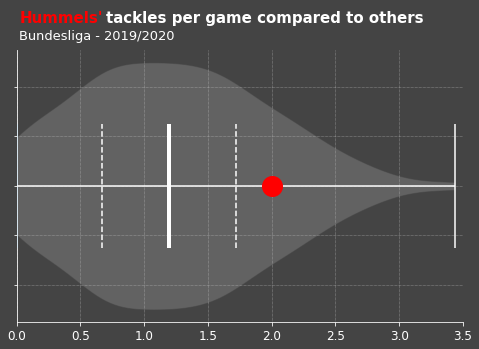

In [6]:
player = 'Hummels'
fig, ax = plt.subplots(figsize=(8,5))

fig.set_facecolor(background)
ax.patch.set_facecolor(background)

ax.grid(ls='dotted', lw='0.5', color='lightgray', zorder= 1)

parts = ax.violinplot(
        tackles_per_game, showmedians=True, quantiles=[0.25, 0.75], vert=False)

for pc in parts['bodies']:
    pc.set_facecolor('grey')
    pc.set_edgecolor(background)
    pc.set_alpha(0.5)

parts['cbars'].set_color('w')
parts['cmaxes'].set_color('w')
parts['cmedians'].set_color('w')
parts['cmedians'].set_linewidth(4)
parts['cquantiles'].set_color('w')
parts['cquantiles'].set_linestyles('--')

highlight_textprops =\
[{"color": primary, "fontsize":15, "fontfamily":title_font, "fontweight":'bold'},
 {"color": text_color, "fontsize":15, "fontfamily":title_font, "fontweight":'bold'},
 {"color": text_color, "fontsize":13, "fontfamily":body_font}]

highlight_text.fig_text(x=0.13, y=0.99,
              s="<Hummels'> <tackles per game compared to others>\n<Bundesliga - 2019/2020>",
              highlight_textprops=highlight_textprops)

ax.set_xlim(0,3.5)
ax.tick_params(axis="x", labelsize=12)

ax.set_yticklabels(["Frequency"], color=text_color)
ax.tick_params(axis='y', labelrotation = 90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(text_color)
ax.spines['left'].set_color(text_color)

plt.plot(2, 1, marker="o", markersize=20, markeredgecolor=primary, markerfacecolor=primary)
# plt.tight_layout()
plt.show()

In [10]:
parts.keys()

dict_keys(['bodies', 'cmaxes', 'cmins', 'cbars', 'cmedians', 'cquantiles'])

In [11]:
dir(parts['cmedians'])

['_A',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiaseds',
 '_axes',
 '_bcast_lwls',
 '_callbacks',
 '_capstyle',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_default_contains',
 '_edge_default',
 '_edge_is_mapped',
 '_edgecolors',
 '_face_is_mapped',
 '_facecolors',
 '_get_clipping_extent_bbox',
 '_get_default_antialiased',
 '_get_default_edgecolor',
 '_get_default_facecolor',
 '_get_default_linewidth',
 '_gid',
 '_hatch',
 '_hatch_color',
 '_id_norm',
 '_in_layout',
 '_joinstyle',
 '_label',
 '_linestyles',
 '_linewidths',
 '_mapped_colors',
 '_mouseove

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


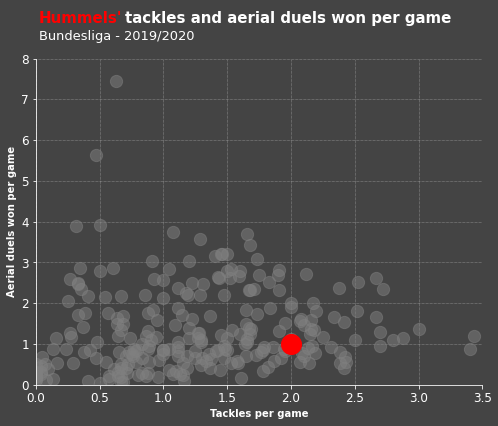

In [12]:
tackles_per_game = test_df[test_df.tacklePerGame.isnull() == False].tacklePerGame.values
aerial_won_per_game = test_df[test_df.aerialWonPerGame.isnull() == False].aerialWonPerGame.values

fig, ax = plt.subplots(figsize=(8,6))

fig.set_facecolor(background)
ax.patch.set_facecolor(background)

ax.grid(ls='dotted', lw='0.5', color='lightgray', zorder= 1)

highlight_textprops =\
[{"color": primary, "fontsize":15, "fontfamily":title_font, "fontweight":'bold'},
 {"color": text_color, "fontsize":15, "fontfamily":title_font, "fontweight":'bold'},
 {"color": text_color, "fontsize":13, "fontfamily":body_font}]

highlight_text.fig_text(x=0.13, y=0.99,
              s="<Hummels'> <tackles and aerial duels won per game>\n<Bundesliga - 2019/2020>",
              highlight_textprops=highlight_textprops)

ax.set_xlabel('Tackles per game', fontweight='bold', color=text_color, fontfamily=body_font)
ax.set_ylabel('Aerial duels won per game', fontweight='bold', color=text_color, fontfamily=body_font)

ax.scatter(tackles_per_game, aerial_won_per_game,
            s=150,
            color='grey',
            alpha=0.5,
            zorder=2)

ax.set_xlim(0,3.5)
ax.tick_params(axis="x", labelsize=12)

ax.set_ylim(0,8)
ax.tick_params(axis="y", labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(text_color)
ax.spines['left'].set_color(text_color)

plt.plot(2, 1, marker="o", markersize=20, markeredgecolor=primary, markerfacecolor=primary)
plt.show()

In [13]:
test_df[['firstName', 'lastName', 'aerialWonPerGame']].sort_values(by=['aerialWonPerGame'], ascending=False)

,firstName,lastName,aerialWonPerGame
129877,Sebastian,Andersson,7.444444
129898,Bas,Dost,5.647059
129892,Wout,Weghorst,3.923077
130084,Davie,Selke,3.894737
129980,Robin,Koch,3.740741
...,...,...,...
130578,Martin,Harnik,NaN
130579,Yvon,Mvogo,NaN
130580,Daishawn,Redan,NaN
130581,Levent,Mercan,NaN


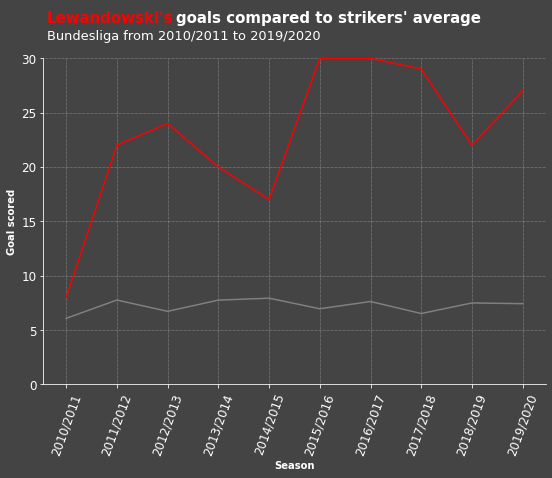

In [14]:
lewa_goals = bundesliga_df[(bundesliga_df.lastName == 'Lewandowski') & (bundesliga_df.goal_x.isnull()==False)][['seasonName','goal_x']]

forwards = bundesliga_df[bundesliga_df.positionText == 'Forward']
forward_goals = forwards[['seasonName', 'goal_x']].groupby('seasonName').mean().values

fig, ax = plt.subplots(figsize=(9,6))

fig.set_facecolor(background)
ax.patch.set_facecolor(background)

ax.grid(ls='dotted', lw='0.5', color='lightgray', zorder= 1)

highlight_textprops =\
[{"color": primary, "fontsize":15, "fontfamily":title_font, "fontweight":'bold'},
 {"color": text_color, "fontsize":15, "fontfamily":title_font, "fontweight":'bold'},
 {"color": text_color, "fontsize":13, "fontfamily":body_font}]

highlight_text.fig_text(x=0.13, y=0.99,
              s="<Lewandowski's> <goals compared to strikers' average>\n<Bundesliga from 2010/2011 to 2019/2020>",
              highlight_textprops=highlight_textprops)

ax.set_xlabel('Season', color=text_color, fontweight='bold', fontfamily=body_font)
ax.set_ylabel('Goal scored', color=text_color, fontweight='bold', fontfamily=body_font)

ax.plot(lewa_goals.goal_x.values[::-1],color=primary)
ax.plot(forward_goals[::-1][:len(lewa_goals)], color='grey')


plt.xticks(range(0,len(lewa_goals.seasonName.values)), lewa_goals.seasonName.values[::-1])
ax.tick_params(axis="x", labelcolor="white", labelsize=12, labelrotation=70)

# ax.set_xlim(0,3.5)
# ax.tick_params(axis="x", labelsize=12)

ax.set_ylim(0,30)
ax.tick_params(axis="y", labelsize=12, labelcolor="white")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(text_color)
ax.spines['left'].set_color(text_color)

plt.show()

In [15]:
print(set(list(who_scored.columns)))

{'dribbleWonPerGame', 'shotOffTarget', 'aerialWonPerGame', 'foulCommitted', 'penaltyTaken', 'tournamentName', 'shotSetPiece', 'keyPassesTotal', 'shotsTotal_x', 'saveTotal', 'goal_y', 'shotOpenPlay', 'assistTotal', 'saveSixYardBox', 'dispossessedPerGame', 'challengeLost', 'goalObox', 'keyPassLong', 'passCrossBlockedDefensive', 'shotsTotal_y.2', 'savePenaltyArea', 'passLongBallInaccurate', 'passFreekickInaccurate', 'shotsTotal_y.3', 'passSuccess_x', 'goalOpenPlay', 'clearancePerGame', 'goalRightFoot', 'seasonName', 'passLongBallAccurate', 'keyPassPerGame_x', 'isOpta', 'name', 'clearanceTotal', 'keyPassShort', 'teamId', 'assist', 'turnoverPerGame', 'minsPlayed', 'assistTotal_y', 'foulGiven', 'shotRightFoot', 'shotPenaltyArea', 'goalSetPiece', 'duelAerialWon', 'goalPenaltyArea', 'interceptionAll', 'shortPassInaccurate', 'shotOboxTotal', 'goalOwn_x', 'accurateThroughBallPerGame', 'lastName', 'offsideGivenPerGame', 'shotCounter', 'passTotal', 'tackleTotalAttempted', 'assistCorner', 'penaltyS

In [16]:
player_name = 'Lewandowski'

lewa_apps = bundesliga_df[(bundesliga_df.lastName == player_name ) & (bundesliga_df.seasonName=='2019/2020')].apps
lewa_goals = round(bundesliga_df[(bundesliga_df.lastName == player_name ) & (bundesliga_df.seasonName=='2019/2020')].goal_x / lewa_apps, 2)
lewa_assists = round(bundesliga_df[(bundesliga_df.lastName == player_name ) & (bundesliga_df.seasonName=='2019/2020')].assistTotal / lewa_apps, 2)
lewa_aerial_won = round(bundesliga_df[(bundesliga_df.lastName == player_name ) & (bundesliga_df.seasonName=='2019/2020')].aerialWonPerGame, 2)
lewa_shots = round(bundesliga_df[(bundesliga_df.lastName == player_name ) & (bundesliga_df.seasonName=='2019/2020')].shotsPerGame_x, 2)
lewa_dribble_won = round(bundesliga_df[(bundesliga_df.lastName == player_name ) & (bundesliga_df.seasonName=='2019/2020')].dribbleWonPerGame, 2)
lewa_key_passes = round(bundesliga_df[(bundesliga_df.lastName == player_name ) & (bundesliga_df.seasonName=='2019/2020')].keyPassPerGame_x, 2)
lewa_shots_on_post = round(bundesliga_df[(bundesliga_df.lastName == player_name ) & (bundesliga_df.seasonName=='2019/2020')].shotOnPost, 2)
lewa_rating = round(bundesliga_df[(bundesliga_df.lastName == player_name ) & (bundesliga_df.seasonName=='2019/2020')].rating, 2)

forwards = forwards[forwards.positionText == 'Forward']
forward_goals = forwards[['seasonName', 'goal_x']].groupby('seasonName').mean().values

forwards_apps = forwards[forwards.seasonName=='2019/2020'].apps.sum()
forwards_goals = round(forwards[forwards.seasonName=='2019/2020'].goal_x.sum() / forwards_apps, 2)
forwards_assists = round(forwards[forwards.seasonName=='2019/2020'].assistTotal.sum() / forwards_apps, 2)
forwards_aerial_won = round(forwards[forwards.seasonName=='2019/2020'].aerialWonPerGame.mean(), 2)
forwards_shots = round(forwards[forwards.seasonName=='2019/2020'].shotsPerGame_x.mean(), 2)
forwards_dribble_won = round(forwards[forwards.seasonName=='2019/2020'].dribbleWonPerGame.mean(), 2)
forwards_key_passes = round(forwards[forwards.seasonName=='2019/2020'].keyPassPerGame_x.mean(), 2)
forwards_shots_on_post = round(forwards[forwards.seasonName=='2019/2020'].shotOnPost.mean(), 2)
forwards_rating = round(forwards[forwards.seasonName=='2019/2020'].rating.mean(), 2)




In [17]:
restaurant_1 = [forwards_goals, forwards_assists, forwards_shots, forwards_shots_on_post,
     forwards_key_passes, forwards_dribble_won, forwards_aerial_won, forwards_rating]

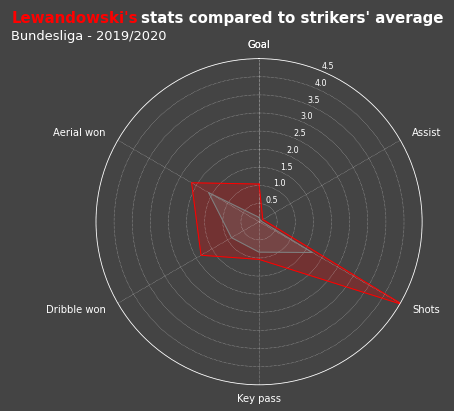

In [18]:
categories = ['Goal', 'Assist', 'Shots', 'Key pass', 'Dribble won', 'Aerial won']
categories = [*categories, categories[0]]

player = [lewa_goals, lewa_assists,  lewa_shots,
     lewa_key_passes, lewa_dribble_won, lewa_aerial_won]
others = [forwards_goals, forwards_assists,  forwards_shots,
     forwards_key_passes, forwards_dribble_won, forwards_aerial_won]
player = [*player, player[0]]
others = [*others, others[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(player))

fig, ax = plt.subplots(figsize=(9,6), subplot_kw=dict(polar=True))

fig.set_facecolor(background)
ax.patch.set_facecolor(background)

ax.grid(ls='dotted', lw='0.5', color='lightgray', zorder= 1)

highlight_textprops =\
[{"color": primary, "fontsize":15, "fontfamily":title_font, "fontweight":'bold'},
 {"color": text_color, "fontsize":15, "fontfamily":title_font, "fontweight":'bold'},
 {"color": text_color, "fontsize":13, "fontfamily":body_font}]

highlight_text.fig_text(x=0.13, y=0.99,
              s="<Lewandowski's> <stats compared to strikers' average>\n<Bundesliga - 2019/2020>",
              highlight_textprops=highlight_textprops)

ax.plot(label_loc, player, label=player_name, linewidth=1, color=primary)
ax.fill(label_loc, player, color=primary, alpha=0.25)
ax.plot(label_loc, others, label='Others', linewidth=1, color='grey')
ax.fill(label_loc, others, color='grey', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(label_loc), labels=categories)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels()[:-1], label_loc[:-1]):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 4.5)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='w')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8, color='w')
# Change the color of the circular gridlines.
ax.grid(ls='dotted', lw='0.5', color='lightgrey', zorder= 1)
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('w')
# Change the background color inside the circle itself.
ax.set_facecolor(background)

plt.show()
